## Ques 1: create 'merged exp normal.csv' ##

In [ ]:
import os
import pandas as pd
import numpy as np
import csv
from os.path import isfile, join
from os import listdir
DirNor = input("Enter the directory path for the Normal Experiments folder of csv files to be merged")
#DirNor=r'C:\Users\solan\Downloads\Subjects\Winter\Machine Learning\exam\Datasets\Datasets\Normal_Experiments'
filenames = [f for f in listdir(DirNor) if isfile(join(DirNor, f))]
dflist=[]
colnames= ['X1','X2','X3','X4','X5','X6','X7','X8','Sds_Armed','Anomaly_Tag']
for file in filenames:
    data = pd.read_csv(DirNor+'/'+ file)
    data = data[data.Sds_Armed != 0]
    dflist.append(data)
DF=pd.concat(dflist,axis=0)
DF.columns=colnames
DF.to_csv(DirNor+'/'+ 'merged exp normal.csv', index=False)
row_count = (sum(1 for row in csv.reader( open(DirNor+'/'+ 'merged exp normal.csv') ) )-1)
print(f'The merged exp normal.csv has been generated in same directory and the no. of examples is {row_count}')

## Ques 2:  create "Experiments with Anomalies"

In [8]:
DirAnNor= input('Enter the directory path for the Experiments with Anomalies folder of csv files to be merged')
#DirAnNor =r'C:\Users\solan\Downloads\Subjects\Winter\Machine Learning\exam\Datasets\Datasets\Experiments_with_Anomalies'
filenames1 = [f for f in listdir(DirAnNor) if isfile(join(DirAnNor, f))]
dflist1=[]
colnames1= ['X1','X2','X3','X4','X5','X6','X7','X8','Sds_Armed','Anomaly_Tag']
for file in filenames1:
    data = pd.read_csv(DirAnNor+'/'+ file)
    data = data[data.Sds_Armed != 0]
    dflist1.append(data)
DF1=pd.concat(dflist1,axis=0)
DF1.columns=colnames1
DF1.to_csv(DirAnNor+'/'+ 'merged exp contains anomalies.csv', index=False)
row_count1 = (sum(1 for row in csv.reader( open(DirAnNor+'/'+ 'merged exp contains anomalies.csv') ) )-1)
print(f'The merged exp contains anomalies.csv has been generated in same directory and the no. of examples is {row_count1}')

Enter the directory path for the Experiments with Anomalies folder of csv files to be mergedC:\Users\solan\Downloads\Subjects\Winter\Machine Learning\exam\Datasets\Datasets\Experiments_with_Anomalies
The merged exp contains anomalies.csv has been generated in same directory and the no. of examples is 45626


## Ques 3: Significance Test using ExtraTreesClassifier

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings("ignore")
a=r'C:\Users\solan\Downloads\Subjects\Winter\Machine Learning\exam\Datasets\Datasets\Experiments_with_Anomalies\merged exp contains anomalies.csv'
#a=input('Enter the directory path for merged exp contains anomalies.csv file')
Adata = pd.read_csv(a)
array = Adata.values
X = array[:,0:8]
Y = array[:,9]
model = ExtraTreesClassifier()
model.fit(X, Y)
feature_names= list(Adata.columns[0:8])
print(f'All features: {feature_names}')
print(f'features Scores Resp.: {model.feature_importances_}')
print (f'Significant Features in descending order : {[feature_names[i] for i in np.argsort(model.feature_importances_[0:8])[::-1]]}')

All features: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
features Scores Resp.: [0.23547873 0.17010471 0.13365553 0.14845778 0.08277244 0.07622602
 0.07286903 0.08043577]
Significant Features in descending order : ['X1', 'X2', 'X4', 'X3', 'X5', 'X8', 'X6', 'X7']


## Ques 4: Model the normal process \merged exp normal.csv" using Gaussian distribution.
## A) Consider all features (X1, X2, ..., X8)

In [14]:
from scipy.stats import multivariate_normal
from scipy.stats import norm
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
n=r'C:\Users\solan\Downloads\Subjects\Winter\Machine Learning\exam\Datasets\Datasets\Normal_Experiments\merged exp normal.csv'
#n=input('Enter the directory path for merged exp normal.csv file')
data = pd.read_csv(n)
X1=data.iloc[:,0]
std1 = np.std(data.iloc[:,0])
mean1 = np.mean(data.iloc[:,0])
pdf1 = stats.norm.pdf(X1,std1,mean1)
print(f'feature X1 :  Mean is {mean1} , standard deviation is {std1}')
print(f' PDF is  {pdf1}')

X2=data.iloc[:,1]
std2 = np.std(data.iloc[:,1])
mean2 = np.mean(data.iloc[:,1])
pdf2 = stats.norm.pdf(X2,std2,mean2)
print(f'feature X2 :  Mean is {mean2} , standard deviation is {std2}')
print(f' PDF is  {pdf2}')

X3=data.iloc[:,2]
std3 = np.std(data.iloc[:,2])
mean3 = np.mean(data.iloc[:,2])
pdf3 = stats.norm.pdf(X3,std3,mean3)
print(f'feature X3 :  Mean is {mean3} , standard deviation is {std3}')
print(f' PDF is  {pdf3}')

X4=data.iloc[:,3]
std4 = np.std(data.iloc[:,3])
mean4 = np.mean(data.iloc[:,3])
pdf4 = stats.norm.pdf(X4,std4,mean4)
print(f'feature X4 :  Mean is {mean4} , standard deviation is {std4}')
print(f' PDF is  {pdf4}')

X5=data.iloc[:,4]
std5 = np.std(data.iloc[:,4])
mean5 = np.mean(data.iloc[:,4])
pdf5= stats.norm.pdf(X5,std5,mean5)
print(f'feature X5 :  Mean is {mean5} , standard deviation is {std5}')
print(f' PDF is  {pdf5}')

X6=data.iloc[:,5]
std6 = np.std(data.iloc[:,5])
mean6 = np.mean(data.iloc[:,5])
pdf6 = stats.norm.pdf(X6,std6,mean6)
print(f'feature X6 :  Mean is {mean6} , standard deviation is {std6}')
print(f' PDF is  {pdf6}')

X7=data.iloc[:,6]
std7 = np.std(data.iloc[:,6])
mean7 = np.mean(data.iloc[:,6])
pdf7 = stats.norm.pdf(X7,std7,mean7)
print(f'feature X7 :  Mean is {mean7} , standard deviation is {std7}')
print(f' PDF is  {pdf7}')

X8=data.iloc[:,7]
std8 = np.std(data.iloc[:,7])
mean8 = np.mean(data.iloc[:,7])
pdf8 = stats.norm.pdf(X8,std8,mean8)
print(f'feature X8 :  Mean is {mean8} , standard deviation is {std8}')
print(f' PDF is  {pdf8}')

feature X1 :  Mean is 0.4974996959883466 , standard deviation is 0.48695492098077237
 PDF is  [0.79477436 0.79410225 0.79379825 ... 0.68821991 0.68998168 0.68928127]
feature X2 :  Mean is 0.8838023869292996 , standard deviation is 0.9896170948383087
 PDF is  [0.43271107 0.43188563 0.43136828 ... 0.33431448 0.33819764 0.3388369 ]
feature X3 :  Mean is 7.763044933576621 , standard deviation is 13.9004711898007
 PDF is  [0.03068206 0.03065878 0.03065517 ... 0.0342229  0.03369612 0.03350061]
feature X4 :  Mean is 2.617440304615524 , standard deviation is 3.466286776572451
 PDF is  [0.11247743 0.11248078 0.11246403 ... 0.14920418 0.14869544 0.14847513]
feature X5 :  Mean is 0.47749564887499996 , standard deviation is 0.7798352786337822
 PDF is  [0.42421958 0.41761348 0.41890151 ... 0.51612047 0.56142962 0.61199392]
feature X6 :  Mean is 0.8497762248286971 , standard deviation is 1.5709417583932361
 PDF is  [1.95577199e-01 1.94627922e-01 1.95647256e-01 ... 1.69409379e-14
 5.79634161e-14 9.11

[Text(0, 0.5, 'datapoints'), Text(0.5, 0, 'PDF8')]

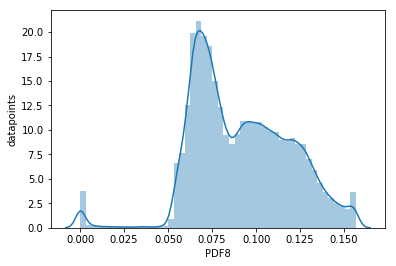

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.distplot(pdf8);
ax.set(xlabel='PDF8', ylabel='datapoints')

## Ques 4, Part B) Mark the most important two features

In [34]:
print (f'For two Important features X1 and X2, mean is {mean1} and {mean2}')
print(f'for two important features X1 and X2, standard deviation is {std1} and {std2}')
print(f' for two important features X1 and X2, PDF is  {pdf1} and {pdf2}')

For two Important features X1 and X2, mean is 0.4974996959883466 and 0.8838023869292996
for two important features X1 and X2, standard deviation is 0.48695492098077237 and 0.9896170948383087
 for two important features X1 and X2, PDF is  [0.79477436 0.79410225 0.79379825 ... 0.68821991 0.68998168 0.68928127] and [0.43271107 0.43188563 0.43136828 ... 0.33431448 0.33819764 0.3388369 ]


## Ques 4, Part C) PCA 

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
Xdata = data[['X1','X2','X3','X4','X5','X6','X7','X8']]
features= ['X1','X2','X3','X4','X5','X6','X7','X8']
#Xdata = StandardScaler().fit_transform(Xdata)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(Xdata)
pplDf = pd.DataFrame(data = principalComponents, columns = ['pcacomp_1', 'pcacomp_2'])
print(pplDf)

        pcacomp_1  pcacomp_2
0       -3.266245   0.433386
1       -3.217673   0.467019
2       -3.187650   0.484955
3       -3.283749   0.442591
4       -3.402870   0.398576
5       -3.610113   0.496068
6       -3.778678   0.775731
7       -3.887797   0.790935
8       -3.926794   0.778865
9       -3.850411   0.828779
10      -3.786833   0.873551
11      -3.742733   0.905466
12      -3.736759   0.919992
13      -3.752507   0.923270
14      -3.837697   0.890808
15      -3.909215   0.862733
16      -3.861959   0.896903
17      -3.824237   0.924537
18      -3.861387   0.915132
19      -3.869418   0.923859
20      -3.876027   0.937935
21      -3.915234   0.935306
22      -3.983012   0.914373
23      -4.075406   0.882349
24      -4.093406   0.895013
25      -4.010414   0.956849
26      -3.968570   0.995171
27      -3.961576   1.012610
28      -3.993361   1.012150
29      -4.018145   1.012295
...           ...        ...
152326  48.629433 -90.091956
152327  45.799515 -85.063747
152328  43.194

## Ques 5 : Model "merged exp normal.csv" using Gaussian distribution
## Considering all features are dependent

Mean is X1    0.497500
X2    0.883802
X3    7.763045
X4    2.617440
X5    0.477496
X6    0.849776
X7    7.395009
X8    2.546401
dtype: float64
Covariance is [[2.37126651e-01 4.69538930e-01 3.82769718e+00 1.28335979e+00
  1.41805293e-01 2.80584469e-01 2.03403131e+00 7.17838004e-01]
 [4.69538930e-01 9.79348422e-01 9.23135016e+00 2.87561328e+00
  2.74457646e-01 5.81016677e-01 5.07358424e+00 1.61912666e+00]
 [3.82769718e+00 9.23135016e+00 1.93224368e+02 4.20865329e+01
  1.95629584e+00 5.18325066e+00 1.12064358e+02 2.43727331e+01]
 [1.28335979e+00 2.87561328e+00 4.20865329e+01 1.20152229e+01
  6.71427684e-01 1.56703191e+00 2.29597979e+01 6.65135806e+00]
 [1.41805293e-01 2.74457646e-01 1.95629584e+00 6.71427684e-01
  6.08147053e-01 1.19032686e+00 8.64479866e+00 2.80735421e+00]
 [2.80584469e-01 5.81016677e-01 5.18325066e+00 1.56703191e+00
  1.19032686e+00 2.46787421e+00 1.96808811e+01 6.13841069e+00]
 [2.03403131e+00 5.07358424e+00 1.12064358e+02 2.29597979e+01
  8.64479866e+00 1.96808811e+01

[Text(0, 0.5, 'datapoints'), Text(0.5, 0, 'PDF')]

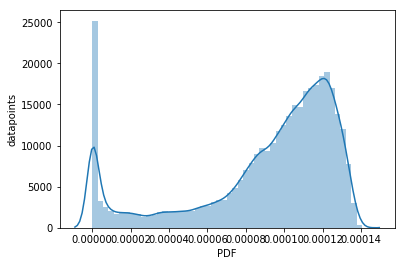

In [53]:
data1=data.iloc[:,0:8]

def estimateGaussian(data1):
    mu = np.mean(data1, axis=0)
    sigma = np.cov(data1.T)
    return mu, sigma
def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

mu,sigma= estimateGaussian(data1)
pdf = multivariateGaussian(data1,mu,sigma)
print(f'Mean is {mu}\nCovariance is {sigma}\nPDF is {pdf}')
ax=sns.distplot(pdf);
ax.set(xlabel='PDF', ylabel='datapoints')

## 5 B) two important features

Mean is [0.4974997  0.88380239]
Covariance is [[0.23712665 0.46953893]
 [0.46953893 0.97934842]]
PDF is [1.44920334 1.44771044 1.44707598 ... 0.61759315 0.64844257 0.66137463]


[Text(0, 0.5, 'datapoints'), Text(0.5, 0, 'PDF')]

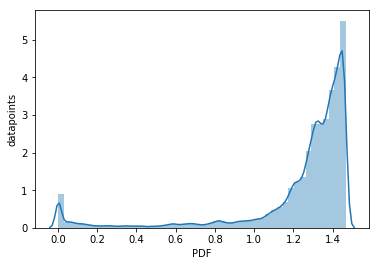

In [56]:
data1=data.iloc[:,0:2]

def estimateGaussian(data1):
    mu = np.mean(data1, axis=0)
    sigma = np.cov(data1.T)
    return mu, sigma
def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

mu,sigma= estimateGaussian(data1)
pdf = multivariateGaussian(data1,mu,sigma)
print(f'Mean is {mu.values}\nCovariance is {sigma}\nPDF is {pdf}')
ax=sns.distplot(pdf);
ax.set(xlabel='PDF', ylabel='datapoints')

## 5. C) PCA

        pcacomp_1  pcacomp_2
0       -3.266245   0.433386
1       -3.217673   0.467019
2       -3.187650   0.484955
3       -3.283749   0.442591
4       -3.402870   0.398576
5       -3.610113   0.496068
6       -3.778678   0.775731
7       -3.887797   0.790935
8       -3.926794   0.778865
9       -3.850411   0.828779
10      -3.786833   0.873551
11      -3.742733   0.905466
12      -3.736759   0.919992
13      -3.752507   0.923270
14      -3.837697   0.890808
15      -3.909215   0.862733
16      -3.861959   0.896903
17      -3.824237   0.924537
18      -3.861387   0.915132
19      -3.869418   0.923859
20      -3.876027   0.937935
21      -3.915234   0.935306
22      -3.983012   0.914373
23      -4.075406   0.882349
24      -4.093406   0.895013
25      -4.010414   0.956849
26      -3.968570   0.995171
27      -3.961576   1.012610
28      -3.993361   1.012150
29      -4.018145   1.012295
...           ...        ...
152326  48.629433 -90.091956
152327  45.799515 -85.063747
152328  43.194

[Text(0, 0.5, 'datapoints'), Text(0.5, 0, 'PDF')]

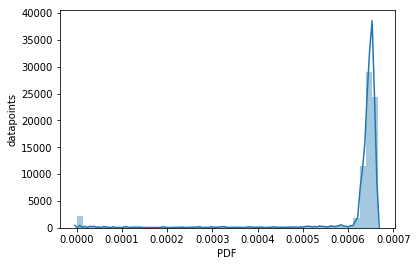

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
Xdata5 = data[['X1','X2','X3','X4','X5','X6','X7','X8']]
features5= ['X1','X2','X3','X4','X5','X6','X7','X8']
#Xdata5 = StandardScaler().fit_transform(Xdata5)
pca5 = PCA(n_components=2)
principalComponents5 = pca5.fit_transform(Xdata5)
pplDf5 = pd.DataFrame(data = principalComponents5, columns = ['pcacomp_1', 'pcacomp_2'])
print(pplDf5)
mu5,sigma5= estimateGaussian(pplDf5)
pdf5 = multivariateGaussian(pplDf5,mu5,sigma5)
print(f'Mean is {mu5.values}\nCovariance is {sigma5}\nPDF is {pdf5}')
ax=sns.distplot(pdf5);
ax.set(xlabel='PDF', ylabel='datapoints')

## Ques 6. Anomaly detection on the model obtained from Ques 5

In [122]:
#c=r'C:\Users\solan\Downloads\Subjects\Winter\Machine Learning\exam\Datasets\Datasets\Experiments_with_Anomalies\HEAT_ID_05_ALARM_OUT_tag.csv'
c=input('the explanation has been made based on HEAT_ID_05_ALARM_OUT_tag.csv , please enter the path for same')
datacc = pd.read_csv(c)
datac1 = datacc[datacc.Sds_Armed != 0]
datac=datac1.iloc[:,0:8]
muc,sigmac= estimateGaussian(datac)
pdfcc = multivariateGaussian(datac,muc,sigmac)
# Epsilon choden randomly from training model.
th=0.0001652625192825427
totalp=np.sum(pdfcc<th)
totala=np.sum(datac1.Anomaly_Tag==1)
Precision = totala/totalp
print('Test case used HEAT_ID_05_ALARM_OUT_tag.csv')
print(f'Epsilon value from Gaussian model of 5th ques used : {th}')
print(f'Total anomalies predicted to generate an alarm {totalp}')
print(f'Total actual anomalies in dataset {totala}')
print(f'total no. of examples : {len(datac1)}')
print(f'Precision is {Precision}')

the explanation has been made based on HEAT_ID_05_ALARM_OUT_tag.csv , please enter the path for sameC:\Users\solan\Downloads\Subjects\Winter\Machine Learning\exam\Datasets\Datasets\Experiments_with_Anomalies\HEAT_ID_05_ALARM_OUT_tag.csv
Test case used HEAT_ID_05_ALARM_OUT_tag.csv
Epsilon value from Gaussian model of 5th ques used : 0.0001652625192825427
Total anomalies predicted to generate an alarm 416
Total actual anomalies in dataset 241
total no. of examples : 2499
Precision is 0.5793269230769231


## Ques 7 Plot of generated alarm, true anomaly flags(from the dataset) and the feature X1

In [113]:
d7=pd.DataFrame(pdfcc,datac1['X1'])
d7['AN']= datac1['Anomaly_Tag'].values

for i in range(2499):
    if d7['AN'].values[i] < th:
        d7['ANd'][i]= 0
    else:
        d7['ANd'][i]= 1
print(d7)


KeyError: 'ANd'

## Ques 8 : supervised learning: Logistic Regression for classifying the events

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss, f1_score
#d=r'C:\Users\solan\Downloads\Subjects\Winter\Machine Learning\exam\Datasets\Datasets\Experiments_with_Anomalies\HEAT_ID_05_ALARM_OUT_tag.csv'
datacc = pd.read_csv(c)
c1 = datacc[datacc.Sds_Armed != 0]
c1['split'] = np.random.randn(c1.shape[0], 1)
msk = np.random.rand(len(c1)) <= 0.80
val = c1[msk]
test = c1[~msk]
X = val.iloc[:,0:8]
Y=val.iloc[:,9]
logreg = LogisticRegression()
logreg.fit(X,Y)
y_pred = logreg.predict(test.iloc[:,0:8])
#print(y_pred)
# y_pred_proba = logreg.predict_proba(test.iloc[:,0:8])[:, 1]
# [fpr, tpr, thr] = roc_curve(test.iloc[:,9], y_pred_proba)
print(f'confusion matrix:{confusion_matrix(test.iloc[:,9], y_pred)}')
print(f' Accuracy is : {accuracy_score(test.iloc[:,9], y_pred)}')
print(f' Precision is : {precision_score(test.iloc[:,9], y_pred)}')
print(f' Recall Score is : {recall_score(test.iloc[:,9], y_pred)}')
print(f' F1 Score is : {f1_score(test.iloc[:,9], y_pred)}')
print(f'report: {classification_report(test.iloc[:,9], y_pred)}')

confusion matrix:[[409   0]
 [ 32  11]]
 Accuracy is : 0.9292035398230089
 Precision is : 1.0
 Recall Score is : 0.2558139534883721
 F1 Score is : 0.40740740740740744
report:               precision    recall  f1-score   support

           0       0.93      1.00      0.96       409
           1       1.00      0.26      0.41        43

   micro avg       0.93      0.93      0.93       452
   macro avg       0.96      0.63      0.68       452
weighted avg       0.93      0.93      0.91       452



## Ques 9 : Unsupervised learning: Kmeans Clustering

In [156]:
import numpy as np

def kmeans(data, k=3, normalize=False, limit=500):
    """Basic k-means clustering algorithm.
    """
    if normalize:
        stats = (data.mean(axis=0), data.std(axis=0))
        data = (data - stats[0]) / stats[1]
    centers = data[:k]
    for i in range(limit):
        classifications = np.argmin(((data[:, :, None] - centers.T[None, :, :])**2).sum(axis=1), axis=1)
        new_centers = np.array([data[classifications == j, :].mean(axis=0) for j in range(k)])
        if (new_centers == centers).all():
            break
        else:
            centers = new_centers
    else:
        raise RuntimeError(f"Clustering algorithm did not complete within {limit} iterations")
    if normalize:
        centers = centers * stats[1] + stats[0]
    print(f"Clustering completed after {i} iterations")
    return classifications, centers

#df = pd.read_csv(c)
val1 = datacc
#print(val1)
X = val1.iloc[:,0:8]
Y=val1.iloc[:,9]

#num_features = X.shape[1]
classifications, centers = kmeans(np.asarray(X), k=2)
Accuracy=0
for index in range(len(X)):
	# Cluster the data using K-Means
	current_label = Y[index]
	predicted_label = classifications[index]

	if current_label == predicted_label:
		Accuracy += 1

Precision= Accuracy
Precision /= len(X)
print(classifications, centers)
print(f'total datapoints correctly predicted {Accuracy}')
print("Manual K-Means Classification Precision = ", Precision)


Clustering completed after 7 iterations
[0 0 0 ... 0 0 0] [[1.19843001e+00 8.36415438e-01 1.26881225e+01 5.79493018e+00
  1.20888596e+00 8.37730749e-01 7.33470915e+00 2.76686236e+00]
 [3.69282892e+00 1.30038790e+01 1.27900728e+03 7.52745887e+02
  4.08479390e+00 1.42947421e+01 1.99799051e+03 1.15755733e+03]]
total datapoints correctly predicted 25484
Manual K-Means Classification Precision =  0.9831790123456791


## Ques 11. Optimize the parameter Epsilon

In [174]:
import numpy as np
b = input('input the path for HEAT_ID_05_ALARM_OUT_tag.csv')
df = pd.read_csv(b)
df['split'] = np.random.randn(df.shape[0], 1)
msk = np.random.rand(len(df)) <= 0.60
val = df[msk]
test = df[~msk]

val_data= val11.iloc[:,0:8]
mut,sigmat= estimateGaussian(val_data)
pval = multivariateGaussian(val_data,mut,sigmat)
yval=val11.iloc[:,9]


def selectThreshHold(yval, pval):
    
    F1 = 0
    bestF1 = 0
    bestEpsilon = 0
    
    stepsize = (np.max(pval) - np.min(pval))/1000
        
    epsVec = np.arange(np.min(pval), np.max(pval), stepsize)
    noe = len(epsVec)
    
    for eps in range(noe):
        epsilon = epsVec[eps]
        pred = (pval < epsilon)
        prec, rec = 0,0
        tp,fp,fn = 0,0,0
        
        try:
            for i in range(np.size(pval,0)):
                if pred[i] == 1 and yval[i] == 1:
                    tp+=1
                elif pred[i] == 1 and yval[i] == 0:
                    fp+=1
                elif pred[i] == 0 and yval[i] == 1:
                    fn+=1
            prec = tp/(tp + fp)
            rec = tp/(tp + fn)
            F1 = 2*prec*rec/(prec + rec)
            if F1 > bestF1:
                bestF1 = F1
                bestEpsilon = epsilon
        except ZeroDivisionError:
            print('Warning dividing by zero!!')          
       
    return bestF1, bestEpsilon

fscore, ep = selectThreshold(pval,yval)
print(fscore, ep)
print(pval,yval)

total=np.sum(pdf<ep)
#print(total)

test_data= test.iloc[:,0:8]
mut,sigmat= estimateGaussian(test_data)
ptest = multivariateGaussian(test_data,mut,sigmat)
total=np.sum(ptest<ep)

#print(test)
totalc=np.sum(test.Anomaly_Tag==1)
print(total,totalc)

TypeError: 'str' object is not callable

## Ques 12 : 

In [181]:
#Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
import pandas
import numpy

#n=r'C:\Users\solan\Downloads\Subjects\Winter\Machine Learning\exam\Datasets\Datasets\Normal_Experiments\merged exp normal.csv'
n = input('Enter the directory path for merged exp normal.csv file')
data = pd.read_csv(n)
array = data
X = array.iloc[:,0:8]
Y = array.iloc[:,9]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
numpy.set_printoptions(precision=3)
print(data.columns.values[0:8])
print(rescaledX[0:5,:])

TypeError: 'str' object is not callable